<a href="https://colab.research.google.com/github/225941-8/Proyecto/blob/main/An%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importo librerías que se van a requerir para trabajar.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import seaborn as sb

# Subo y leo el dataframe.

In [2]:
from google.colab import files
Upload = files.upload()

Saving Analisis.csv to Analisis.csv


In [3]:
Analisis = pd.read_csv(io.BytesIO(Upload["Analisis.csv"]))

In [4]:
from google.colab import files
Upload = files.upload()

Saving Tabulado (2).csv to Tabulado (2).csv


In [5]:
Metro = pd.read_csv(io.BytesIO(Upload["Tabulado (2).csv"]))

In [6]:
Metro = Metro.drop([0, 9],axis=0)
Metro = Metro.rename({'Pasajeros transportados     (Millones de pasajeros)\xa0 c': 'Pasajeros transportados'}, axis=1)
Metro_Pasajeros = Metro[['Periodo', 'Pasajeros transportados']]

<Figure size 1008x720 with 0 Axes>

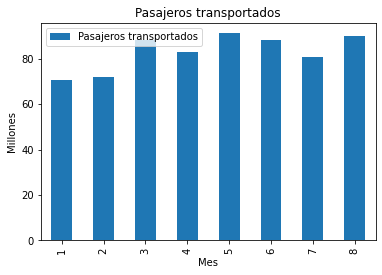

<Figure size 1008x720 with 0 Axes>

In [7]:
my_plot = Metro_Pasajeros.plot(kind="bar")
plt.ylabel('Millones')
plt.xlabel('Mes')
plt.title("Pasajeros transportados")
plt.figure(figsize=(14,10))

# Divido el dataframe por género, ya que voy a trabajar con los casos donde la mujer es la victima, posteriormnte mostramos una gráfica que contiene la cantidad de mujeres y hombres que han reportado algún acto de violencia o abuso sexual sufrido en el metro de la Ciudad de México.

Text(0.5, 0, 'Con o sin detenido')

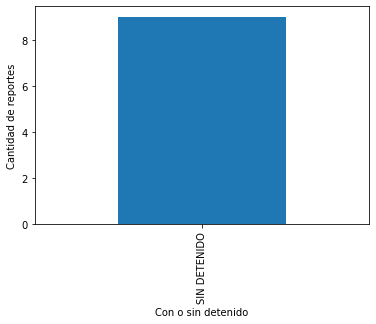

In [33]:
Analisis_Mujeres['sin-detenido'].unique()
#Analisis_Mujeres.fillna('NO SE SABE', inplace=True)
my_plot = Analisis_Mujeres['sin-detenido'].value_counts().head(13).plot(kind='bar')
plt.ylabel('Cantidad de reportes')
plt.xlabel('Con o sin detenido')

In [8]:
Analisis.loc[Analisis['dia'] == 'MIERCOLES', 'dia'] = 'MIÉRCOLES'
Analisis.loc[Analisis['estacion'] == 'AGRICOLAORIENTAL', 'estacion'] = 'AGRICOLA ORIENTAL'
Analisis.loc[(Analisis['estacion'] == 'LÁZARO CARDENAS') | (Analisis['estacion'] == 'LAZARO CARDÉNAS') , 'estacion'] = 'LÁZARO CARDÉNAS'
Analisis.loc[Analisis['estacion'] == 'ZOCALO', 'estacion'] = 'ZÓCALO'
Analisis.loc[Analisis['sexo-agresor'] == 'HOMBRE', 'sexo-agresor'] = 'HOMBRE'

In [9]:
Analisis_Mujeres = Analisis.loc[Analisis['sexo-victima'].str.contains("MUJER", case=False)]
Analisis_Hombres = Analisis.loc[Analisis['sexo-victima'].str.contains("HOMBRE", case=False)]
Analisis_Mujeres['Cuenta'] = 1
Analisis_Hombres['Cuenta'] = 1
Cuenta_Mujeres = Analisis_Mujeres['Cuenta'].sum()
Cuenta_Hombres = Analisis_Hombres['Cuenta'].sum()

Comportamiento_Genero = pd.DataFrame()
Comportamiento_Genero['Mujeres'] = [Cuenta_Mujeres]
Comportamiento_Genero['Hombres'] = [Cuenta_Hombres]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


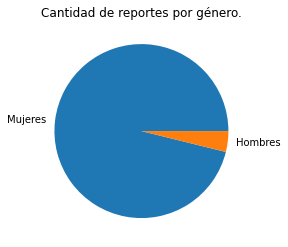

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [31]:
mylabels = ["Mujeres", "Hombres"]
plt.pie(Comportamiento_Genero, labels = mylabels)
plt.title("Cantidad de reportes por género.")
plt.show() 
plt.figure(figsize=(14,10))

# Aquí determinamos cuales son las 10 estaciones que contienen más reportes de violencia o abuso sexual hacia las mujeres.

In [11]:
Comportamiento_Estaciones = Analisis_Mujeres['estacion'].value_counts()

<Figure size 1008x720 with 0 Axes>

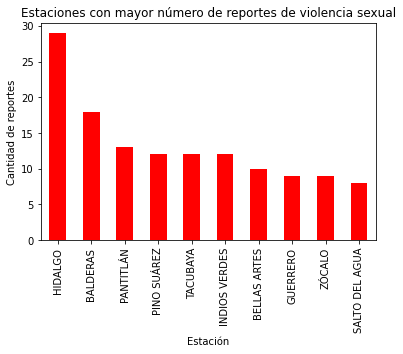

<Figure size 1008x720 with 0 Axes>

In [12]:
my_plot = Comportamiento_Estaciones.head(10).plot(kind="bar", color='red')
plt.title("Estaciones con mayor número de reportes de violencia sexual")
plt.ylabel('Cantidad de reportes')
plt.xlabel('Estación')
plt.figure(figsize=(14,10))

# En esta parte del código, se muestra gráficamente la cantidad de reportes que tienen las líneas del metro contenidas en el Dataframe 

<Figure size 1008x720 with 0 Axes>

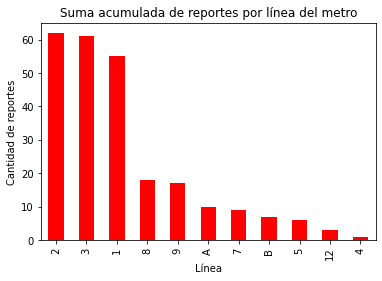

<Figure size 1008x720 with 0 Axes>

In [32]:
Comportamiento_Linea = Analisis_Mujeres['linea'].value_counts()
my_plot = Comportamiento_Linea.plot(kind="bar", color='red')
plt.title("Suma acumulada de reportes por línea del metro")
plt.ylabel('Cantidad de reportes')
plt.xlabel('Línea')
plt.figure(figsize=(14,10))

# En esta línea obtenemos el grupo de edades que ha reportado el mayor número de actos de violencia o abuso sexual hacia las mujeres.

In [47]:
Total = Analisis_Mujeres['Cuenta'].sum()
Mayores = Analisis_Mujeres.loc[Analisis_Mujeres['edad-agresor'] > Analisis_Mujeres['edad-victima']]
Mayores = round((Mayores['Cuenta'].sum()/Total)*100, 2);
Menores = Analisis_Mujeres.loc[Analisis_Mujeres['edad-agresor'] < Analisis_Mujeres['edad-victima']]
Menores = round((Menores['Cuenta'].sum()/Total)*100, 2);
Iguales = Analisis_Mujeres.loc[Analisis_Mujeres['edad-agresor'] == Analisis_Mujeres['edad-victima']]
Iguales = round((Iguales['Cuenta'].sum()/Total)*100, 2);
Promedio = Analisis_Mujeres['edad-victima'].mean()
print("El total de casos reportados por mujeres dentro del sistemma del metro de la Ciudad de México son: ", Total)
print("El porcentaje de victimas menores al agresor es de: ", Mayores)
print("El porcentaje de victimas menores al agresor es de: ", Menores)
print("El porcentaje de victimas con la misma edad del agresor es de: ", Iguales)
Promedio
Analisis_Mujeres['edad-agresor'].mean()
Promedio

El total de casos reportados por mujeres dentro del sistemma del metro de la Ciudad de México son:  249
El porcentaje de victimas menores al agresor es de:  71.89
El porcentaje de victimas menores al agresor es de:  24.9
El porcentaje de victimas con la misma edad del agresor es de:  3.21


27.10843373493976

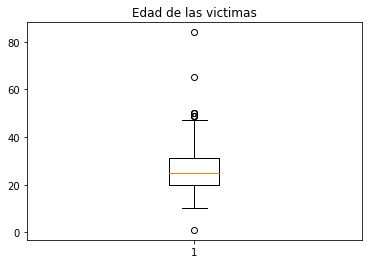

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [34]:
plt.boxplot(Analisis_Mujeres['edad-victima'])
plt.title("Edad de las victimas")
plt.show()
plt.figure(figsize=(14,10))

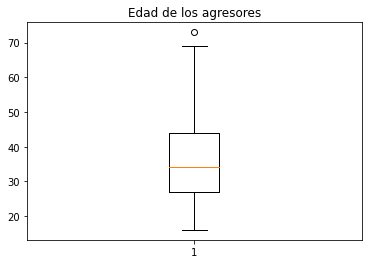

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [35]:
plt.boxplot(Analisis_Mujeres['edad-agresor'])
plt.title("Edad de los agresores")
plt.show()
plt.figure(figsize=(14,10))

<Figure size 1008x720 with 0 Axes>

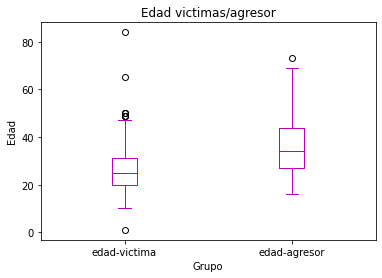

<Figure size 1008x720 with 0 Axes>

In [36]:
Analisis_Mujeres[['edad-victima', 'edad-agresor']].plot(kind='box', color='m')
plt.title("Edad victimas/agresor")
plt.ylabel('Edad')
plt.xlabel('Grupo')
plt.figure(figsize=(14,10))

In [45]:
Analisis_Mujeres.loc[Analisis_Mujeres['edad-victima'] > 48]

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido,Cuenta
92,ERMITA,12,MARTES,10:55,19:00,PALABRAS LASCIVAS Y PERSECUCIÓN CON POSIBLES F...,ACOSO SEXUAL,MUJER,50,HOMBRE,46,NaN,1
100,ZÓCALO,2,LUNES,16:08,16:25,TOCAMIENTO EN GLÚTEOS,ABUSO SEXUAL,MUJER,49,HOMBRE,52,NaN,1
118,ZÓCALO,2,JUEVES,19:45,23:28,VIOLENCIA FAMILIAR (VERBAL Y FÍSICA),VIOLENCIA FAMILIAR,MUJER,50,HOMBRE,53,NaN,1
151,SALTO DEL AGUA,8,JUEVES,10:00,14:50,TOMA DE FOTOGRAFÍAS Y/O VIDEO,ACOSO SEXUAL,MUJER,49,HOMBRE,44,NaN,1
163,PANTITLÁN,5,LUNES,14:50,17:30,PERSECUCIÓN CON POSIBLES FINES LASCIVOS,ACOSO SEXUAL,MUJER,50,HOMBRE,32,NaN,1
191,GUERRERO,3,MARTES,9:39,13:30,VIOLENCIA FAMILIAR (FÍSICA Y VERBAL),VIOLENCIA FAMILIAR,MUJER,49,HOMBRE,54,NaN,1
213,BALDERAS,3,MIÉRCOLES,10:23,18:55,VIOLENCIA FAMILIAR (AGRESIÓN VERBAL),VIOLENCIA FAMILIAR,MUJER,65,HOMBRE,69,NaN,1
214,TACUBA,2,MIÉRCOLES,19:58,3:10,TOCAMIENTO EN GLÚTEOS,ABUSO SEXUAL,MUJER,84,HOMBRE,48,NaN,1
215,CONSTITUCIÓN DE 1917,8,JUEVES,18:55,23:06,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,49,HOMBRE,51,NaN,1


In [41]:
Analisis_Mujeres.loc[Analisis_Mujeres['edad-victima'] < 18]

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido,Cuenta
12,HIDALGO,2,MIÉRCOLES,11:40,17:54,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,17,HOMBRE,29,NaN,1
17,PANTITLÁN,9,LUNES,8:45,18:28,FRICCIÓN DE PENE EN GLÚTEOS,ABUSO SEXUAL,MUJER,12,HOMBRE,36,NaN,1
30,SAN COSME,2,LUNES,15:40,19:15,TOCAMIENTO EN PIERNA,ABUSO SEXUAL,MUJER,12,HOMBRE,30,NaN,1
31,HIDALGO,2,LUNES,19:12,23:24,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,10,HOMBRE,40,NaN,1
44,ISABEL LA CATÓLICA,1,VIERNES,17:33,18:18,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,14,HOMBRE,25,NaN,1
58,PINO SUÁREZ,1,JUEVES,10:40,0:49,TOCAMIENTO EN PIERNA,ABUSO SEXUAL,MUJER,1,HOMBRE,34,NaN,1
59,PANTITLÁN,5,JUEVES,13:14,22:00,TOCAMIENTO EN GLÚTEO Y PIERNA,ABUSO SEXUAL,MUJER,17,HOMBRE,43,NaN,1
76,BALDERAS,3,VIERNES,15:50,23:30,TOCAMIENTO EN ÁREA PÚBICA,ABUSO SEXUAL,MUJER,17,HOMBRE,47,NaN,1
90,ESCUADRÓN 201,8,VIERNES,15:53,13:20,TOMA DE FOTOGRAFÍAS,ACOSO SEXUAL,MUJER,16,HOMBRE,33,NaN,1
132,NATIVITAS,2,LUNES,8:28,9:37,EXHIBICIÓN DE GENITALES,ACOSO SEXUAL,MUJER,15,HOMBRE,38,NaN,1


In [44]:
Analisis_Mujeres.loc[Analisis_Mujeres['edad-agresor'] > 60]

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido,Cuenta
1,OCEANÍA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,31,HOMBRE,63,NaN,1
21,SAN ANTONIO,2,MARTES,10:20,19:40,TOCAMIENTO EN GLÚTEOS,ABUSO SEXUAL,MUJER,28,HOMBRE,62,NaN,1
29,GARIBALDI,B,LUNES,14:20,21:00,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,40,HOMBRE,62,NaN,1
125,ZÓCALO,2,MARTES,8:40,10:10,FAVORES SEXUALES,ACOSO SEXUAL,MUJER,32,HOMBRE,73,NaN,1
142,LA RAZA,5,LUNES,9:50,10:32,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,19,HOMBRE,63,NaN,1
193,HIDALGO,2,MIÉRCOLES,13:37,13:50,VEJACIONES (AGRESIÓN VERBAL),ACOSO SEXUAL,MUJER,23,HOMBRE,67,NaN,1
213,BALDERAS,3,MIÉRCOLES,10:23,18:55,VIOLENCIA FAMILIAR (AGRESIÓN VERBAL),VIOLENCIA FAMILIAR,MUJER,65,HOMBRE,69,NaN,1
227,SAN COSME,2,VIERNES,9:52,19:30,TOCAMIENTO EN AREA PÚBICA,ABUSO SEXUAL,MUJER,16,HOMBRE,62,NaN,1
250,ZÓCALO,2,MARTES,16:51,0:47,FRICCIÓN DE PENE EN GLÚTEOS,ABUSO SEXUAL,MUJER,20,HOMBRE,63,NaN,1
258,CHAPULTEPEC,1,VIERNES,16:42,20:05,TOCAMIENTO EN GLUTEOS,ABUSO SEXUAL,MUJER,43,HOMBRE,62,NaN,1


Text(0.5, 0, 'Delito')

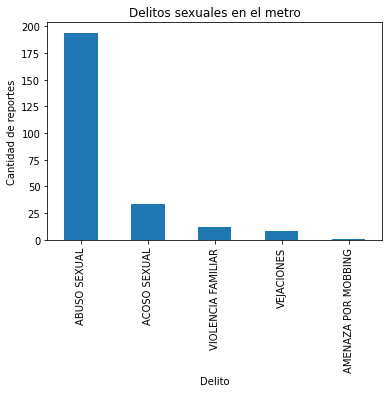

In [52]:
plt.title("Delitos sexuales en el metro")
Analisis_Mujeres['delito'].value_counts().plot(kind='bar')
plt.ylabel('Cantidad de reportes')
plt.xlabel('Delito')

# En esta sección mostramos cuales son los horarios donde más se frecuentan los actos de violencia y acoso hacia las mujeres dentro del sistema de metro de la Ciudad de México.
# Posteriormente, analizaremos la relación entre la hora en la que da inicio el reporte y la hora en la que termina el reporte del acto de violencia o abuso sexual hacia las mujeres en el metro de la Ciudad de México, utilizando las primeras 28 filas del dataframe donde las mujeres son las victimas.

<Figure size 720x432 with 0 Axes>

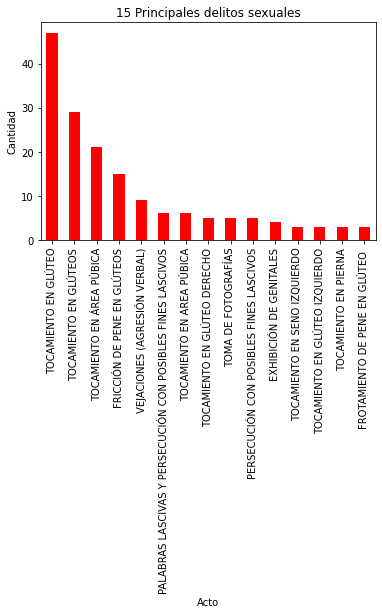

<Figure size 720x432 with 0 Axes>

In [21]:
Comportamiento_Acto = Analisis_Mujeres['descripcion'].value_counts()
my_plot = Comportamiento_Acto.head(15).plot(kind="bar", color='red')
plt.title("15 Principales delitos sexuales")
plt.ylabel('Cantidad')
plt.xlabel('Acto')
plt.figure(figsize=(10,6))

# Creamos un dataframe a través de un diccioanrio, que guarda los nombres de las estaciones de metro de la CDMX donde se ha reportado algún acto de violencia o abuso sexual por parte de las mujeres, con el repectivo día del reporte y una cuenta de la cantidad de reportes por día de la semana.

In [22]:
estaciones = Analisis_Mujeres["estacion"].unique()
estacion_dia = dict()
for estacion in estaciones:
  df_estacion = Analisis_Mujeres[Analisis_Mujeres["estacion"] == estacion]
  estacion_dia[estacion] = df_estacion["dia"].value_counts()

df_estacion_dia = pd.DataFrame(estacion_dia)
df_estacion_dia = df_estacion_dia.transpose()
df_estacion_dia = df_estacion_dia.fillna(0)
df_estacion_dia

,JUEVES,LUNES,MARTES,MIÉRCOLES,VIERNES
SAN PEDRO DE LOS PINOS,0.0,0.0,1.0,0.0,0.0
OCEANÍA,1.0,0.0,0.0,0.0,0.0
SANTA ANITA,0.0,1.0,0.0,0.0,0.0
INSURGENTES,1.0,2.0,0.0,0.0,1.0
BELLAS ARTES,2.0,0.0,1.0,4.0,3.0
...,...,...,...,...,...
GUELATAO,0.0,1.0,0.0,0.0,0.0
CHILPANCINGO,1.0,0.0,0.0,0.0,0.0
FUERA DE LAS INSTALACIONES DEL STC ( PASILLO QUE CONDUCE HACIA EL PARADERO SUR DE TASQUEÑA),0.0,0.0,0.0,0.0,1.0
REFINERIA,0.0,1.0,0.0,0.0,0.0


In [23]:
estaciones = Analisis_Mujeres["estacion"].unique()
estacion_linea = dict()
for estacion in estaciones:
  df_estacion = Analisis_Mujeres[Analisis_Mujeres["estacion"] == estacion]
  estacion_linea[estacion] = df_estacion["linea"].value_counts()

df_estacion_linea = pd.DataFrame(estacion_linea)
df_estacion_linea = df_estacion_linea.transpose()
df_estacion_linea = df_estacion_linea.fillna(0)
df_estacion_linea['Cuenta'] = ''
df_estacion_linea['Cuenta'] = df_estacion_linea['1'] + df_estacion_linea['12'] + df_estacion_linea['2'] + df_estacion_linea['3'] + df_estacion_linea['4'] + df_estacion_linea['5'] + df_estacion_linea['7'] + df_estacion_linea['8'] + df_estacion_linea['9'] + df_estacion_linea['A'] + df_estacion_linea['B']
Descending_estacion_linea = df_estacion_linea.sort_values('Cuenta', ascending=False)
Descending_estacion_linea_cabezas = Descending_estacion_linea.head(10)
Descending_estacion_linea_cabezas

,1,12,2,3,4,5,7,8,9,A,B,Cuenta
HIDALGO,0.0,0.0,17.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
BALDERAS,10.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
PANTITLÁN,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,1.0,0.0,13.0
PINO SUÁREZ,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
TACUBAYA,4.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,12.0
INDIOS VERDES,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
BELLAS ARTES,0.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,10.0
GUERRERO,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
ZÓCALO,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
SALTO DEL AGUA,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0


<Figure size 1008x720 with 0 Axes>

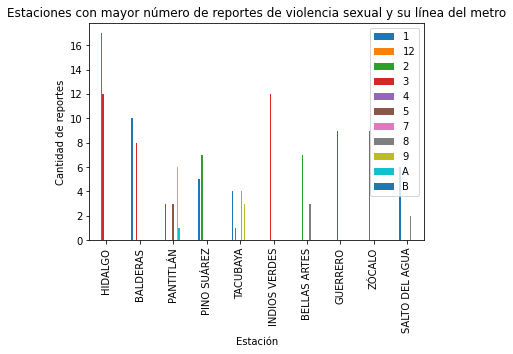

<Figure size 1008x720 with 0 Axes>

In [24]:
Elekipo = Descending_estacion_linea[['1', '12', '2', '3', '4', '5', '7', '8', '9', 'A', 'B']]
my_plot = Elekipo.head(10).plot(kind="bar")
plt.title("Estaciones con mayor número de reportes de violencia sexual y su línea del metro")
plt.ylabel('Cantidad de reportes')
plt.xlabel('Estación')
plt.figure(figsize=(14,10))

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
forecast = list()
est_dict = dict()
#data = df_estacion_dia.drop(["Cuenta", "forecast"], axis=1)
df = pd.DataFrame(columns=["lunes","martes","miercoles","jueves","viernes"])
df["lunes"] = df_estacion_dia["LUNES"]
df["martes"] = df_estacion_dia["MARTES"]
df["miercoles"] = df_estacion_dia["MIÉRCOLES"]
df["jueves"] = df_estacion_dia["JUEVES"]
df["viernes"] = df_estacion_dia["VIERNES"]

for i in range(len(df)):
  row = df.iloc[i].values
  model = SARIMAX(row)
  results = model.fit()
  forecast.append(round(results.predict(start=6,end=6,dynamic=True)[0]))

df["forecast"] = forecast
df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman

,lunes,martes,miercoles,jueves,viernes,forecast
SAN PEDRO DE LOS PINOS,0.0,1.0,0.0,0.0,0.0,0
OCEANÍA,0.0,0.0,0.0,1.0,0.0,0
SANTA ANITA,1.0,0.0,0.0,0.0,0.0,0
INSURGENTES,2.0,0.0,0.0,1.0,1.0,0
BELLAS ARTES,0.0,1.0,4.0,2.0,3.0,1
...,...,...,...,...,...,...
GUELATAO,1.0,0.0,0.0,0.0,0.0,0
CHILPANCINGO,0.0,0.0,0.0,1.0,0.0,0
FUERA DE LAS INSTALACIONES DEL STC ( PASILLO QUE CONDUCE HACIA EL PARADERO SUR DE TASQUEÑA),0.0,0.0,0.0,0.0,1.0,0
REFINERIA,1.0,0.0,0.0,0.0,0.0,0


In [67]:
g = df.sort_values('forecast', ascending=False)
g

,lunes,martes,miercoles,jueves,viernes,forecast
HIDALGO,7.0,6.0,5.0,8.0,3.0,2
PANTITLÁN,2.0,0.0,4.0,3.0,4.0,2
BALDERAS,6.0,3.0,4.0,2.0,3.0,2
SAN LÁZARO,0.0,1.0,1.0,2.0,2.0,2
PINO SUÁREZ,2.0,1.0,3.0,3.0,3.0,2
...,...,...,...,...,...,...
OCEANÍA,0.0,0.0,0.0,1.0,0.0,0
SAN JUAN DE LETRÁN,0.0,0.0,1.0,0.0,0.0,0
IZTACALCO,0.0,0.0,0.0,1.0,0.0,0
CENTRO MÉDICO,0.0,0.0,0.0,1.0,1.0,0


count    249.000000
mean      36.044177
std       12.109133
min       16.000000
25%       27.000000
50%       34.000000
75%       44.000000
max       73.000000
Name: edad-agresor, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


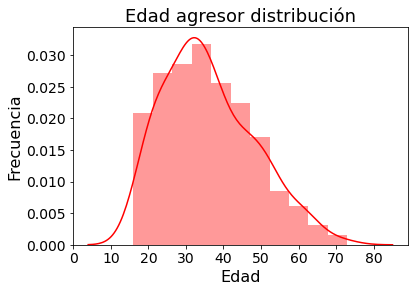

In [27]:
print(cl(Analisis_Mujeres['edad-agresor'].describe()))

sb.distplot(Analisis_Mujeres['edad-agresor'], 
            color = 'red')
plt.title('Edad agresor distribución', 
          fontsize = 18)
plt.xlabel('Edad', 
           fontsize = 16)
plt.ylabel('Frecuencia', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

count    249.000000
mean      27.108434
std        9.829201
min        1.000000
25%       20.000000
50%       25.000000
75%       31.000000
max       84.000000
Name: edad-victima, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


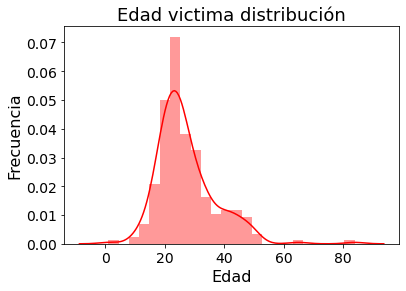

In [28]:
print(cl(Analisis_Mujeres['edad-victima'].describe()))

sb.distplot(Analisis_Mujeres['edad-victima'], 
            color = 'red')
plt.title('Edad victima distribución', 
          fontsize = 18)
plt.xlabel('Edad', 
           fontsize = 16)
plt.ylabel('Frecuencia', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

In [29]:
!pip install kneed # To install only knee-detection algorithm
!pip install kneed[plot] # To also install plotting functions for quick visualizations
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
Analisis_Mujeres_2 = Analisis_Mujeres

In [53]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Analisis_Mujeres_2['estacion'] = encoder.fit_transform(Analisis_Mujeres_2['estacion'])
Analisis_Mujeres_2['descripcion'] = encoder.fit_transform(Analisis_Mujeres_2['descripcion'])
Analisis_Mujeres_2['delito'] = encoder.fit_transform(Analisis_Mujeres_2['delito'])
Analisis_Mujeres_2['dia'] = encoder.fit_transform(Analisis_Mujeres_2['dia'])
Analisis_Mujeres_2['linea'] = encoder.fit_transform(Analisis_Mujeres_2['linea'])
Analisis_Mujeres_2.loc[Analisis_Mujeres_2['sexo-victima'] == 'MUJER', 'sexo-victima'] = 1
Analisis_Mujeres_2['sexo-agresor'] = encoder.fit_transform(Analisis_Mujeres_2['sexo-agresor'])
Analisis_Mujeres_2['hora-inicio-reporte'] = encoder.fit_transform(Analisis_Mujeres_2['hora-inicio-reporte'])
Analisis_Mujeres_2['hora-fin-reporte'] = encoder.fit_transform(Analisis_Mujeres_2['hora-fin-reporte'])
Analisis_Mujeres_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido,Cuenta
0,62,6,2,128,6,31,0,1,23,0,32,NaN,1
1,51,5,0,58,111,31,0,1,31,0,63,NaN,1
3,63,7,1,71,148,71,1,1,27,0,59,NaN,1
4,35,0,1,101,86,31,0,1,24,0,50,SIN DETENIDO,1
5,8,2,0,20,101,31,0,1,22,0,18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,5,6,0,6,21,33,0,1,30,0,20,NaN,1
254,34,3,4,66,115,62,0,1,29,0,49,NaN,1
256,55,6,1,76,123,57,0,1,38,0,36,NaN,1
257,22,3,4,133,173,55,0,1,25,0,56,NaN,1


In [54]:
Analisis_Mujeres_2 = Analisis_Mujeres_2.drop(['sin-detenido'], axis=1)
Analisis_Mujeres_2 = Analisis_Mujeres_2.drop(['Cuenta'], axis=1)

In [55]:
Analisis_Mujeres_2

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor
0,62,6,2,128,6,31,0,1,23,0,32
1,51,5,0,58,111,31,0,1,31,0,63
3,63,7,1,71,148,71,1,1,27,0,59
4,35,0,1,101,86,31,0,1,24,0,50
5,8,2,0,20,101,31,0,1,22,0,18
...,...,...,...,...,...,...,...,...,...,...,...
253,5,6,0,6,21,33,0,1,30,0,20
254,34,3,4,66,115,62,0,1,29,0,49
256,55,6,1,76,123,57,0,1,38,0,36
257,22,3,4,133,173,55,0,1,25,0,56


In [56]:
data_clust = Analisis_Mujeres_2

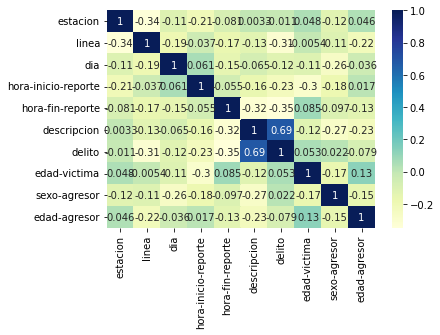

In [57]:
corr_mat = data_clust.corr()
corr_mat
dataplot = sb.heatmap(corr_mat.corr(), cmap="YlGnBu", annot=True)
figsize=(35, 30)
# displaying heatmap
plt.show()

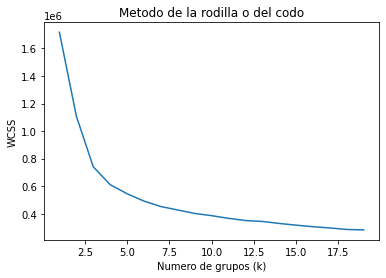

In [58]:
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300,
                  n_init = 10, random_state = 2022)
  kmeans.fit(data_clust)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title("Metodo de la rodilla o del codo")
plt.xlabel("Numero de grupos (k)")
plt.ylabel("WCSS")
plt.show()

In [59]:
kl = KneeLocator(range(1,20), wcss, curve="convex", direction="decreasing")
print("Elbow: ", kl.elbow)

Elbow:  4


In [60]:
kmeans = KMeans(n_clusters=kl.elbow,init="k-means++", max_iter=300,
                n_init=10,random_state=2022)
y_kmeans = kmeans.fit(data_clust)
print(kmeans.cluster_centers_)
kmeans.labels_

[[3.83088235e+01 3.72058824e+00 2.00000000e+00 1.60632353e+02
  5.37941176e+01 3.93382353e+01 3.52941176e-01 1.00000000e+00
  2.52058824e+01 3.46944695e-18 3.69705882e+01]
 [3.17868852e+01 2.90163934e+00 2.00000000e+00 1.19442623e+02
  1.49819672e+02 3.76393443e+01 3.60655738e-01 1.00000000e+00
  2.93114754e+01 3.46944695e-18 3.47049180e+01]
 [3.40816327e+01 3.87755102e+00 1.97959184e+00 3.03061224e+01
  4.21632653e+01 4.23673469e+01 4.08163265e-01 1.00000000e+00
  2.63469388e+01 3.46944695e-18 3.41836735e+01]
 [4.41549296e+01 2.81690141e+00 1.84507042e+00 5.58309859e+01
  1.12647887e+02 4.09577465e+01 5.91549296e-01 1.00000000e+00
  2.75633803e+01 1.40845070e-02 3.75915493e+01]]


array([0, 3, 3, 3, 3, 2, 3, 3, 2, 1, 2, 3, 0, 3, 3, 1, 0, 0, 3, 1, 3, 2,
       2, 3, 0, 0, 2, 0, 3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 0, 1, 3, 0, 1, 1,
       2, 2, 3, 0, 3, 3, 0, 2, 1, 1, 2, 0, 2, 3, 0, 0, 3, 2, 2, 1, 2, 2,
       1, 0, 3, 0, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 1, 2, 2, 3, 0, 2, 3, 3,
       0, 0, 1, 1, 2, 3, 3, 3, 1, 0, 0, 0, 1, 3, 0, 2, 0, 3, 3, 2, 2, 1,
       0, 1, 1, 1, 0, 2, 3, 1, 1, 1, 0, 2, 3, 0, 3, 1, 1, 1, 1, 0, 0, 3,
       0, 1, 0, 1, 0, 0, 2, 0, 3, 3, 0, 3, 0, 2, 2, 3, 0, 1, 3, 3, 2, 1,
       2, 3, 1, 3, 0, 1, 0, 2, 0, 2, 0, 1, 3, 1, 1, 1, 2, 1, 3, 3, 0, 0,
       0, 3, 1, 3, 0, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 3, 0, 1, 0, 0,
       0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 2, 0, 3, 1, 2, 3, 1, 0, 1,
       0, 0, 0, 1, 0, 3, 1, 3, 3, 1, 3, 2, 2, 1, 0, 1, 0, 2, 3, 0, 3, 0,
       2, 1, 2, 3, 3, 1, 1], dtype=int32)

In [61]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,labels
0,-0.317404,-0.590085,0
1,-0.235613,1.452940,3
2,1.341908,0.909169,3
3,-0.338944,0.719443,3
4,-1.184690,-1.562551,3
...,...,...,...
244,-0.915393,-2.151578,2
245,0.568669,0.766242,3
246,0.343700,0.518388,3
247,-0.008385,1.334683,1


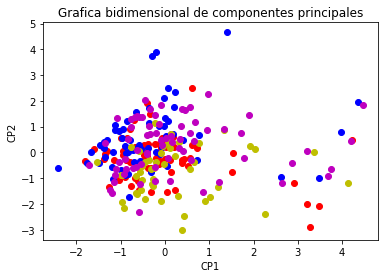

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]


ax.scatter(x_0, y_0, c='r', marker='o')
ax.scatter(x_1, y_1, c='b', marker='o')
ax.scatter(x_2, y_2, c='y', marker='o')
ax.scatter(x_3, y_3, c='m', marker='o')

ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
plt.title("Grafica bidimensional de componentes principales")
plt.show()

In [63]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2", "CP3"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,CP3,labels
0,-0.317404,-0.590085,-0.588841,0
1,-0.235613,1.452940,0.970070,3
2,1.341908,0.909169,0.450541,3
3,-0.338944,0.719443,0.174020,3
4,-1.184690,-1.562551,1.311174,3
...,...,...,...,...
244,-0.915393,-2.151578,1.075370,2
245,0.568669,0.766242,-0.701527,3
246,0.343700,0.518388,0.690341,3
247,-0.008385,1.334683,-1.318045,1


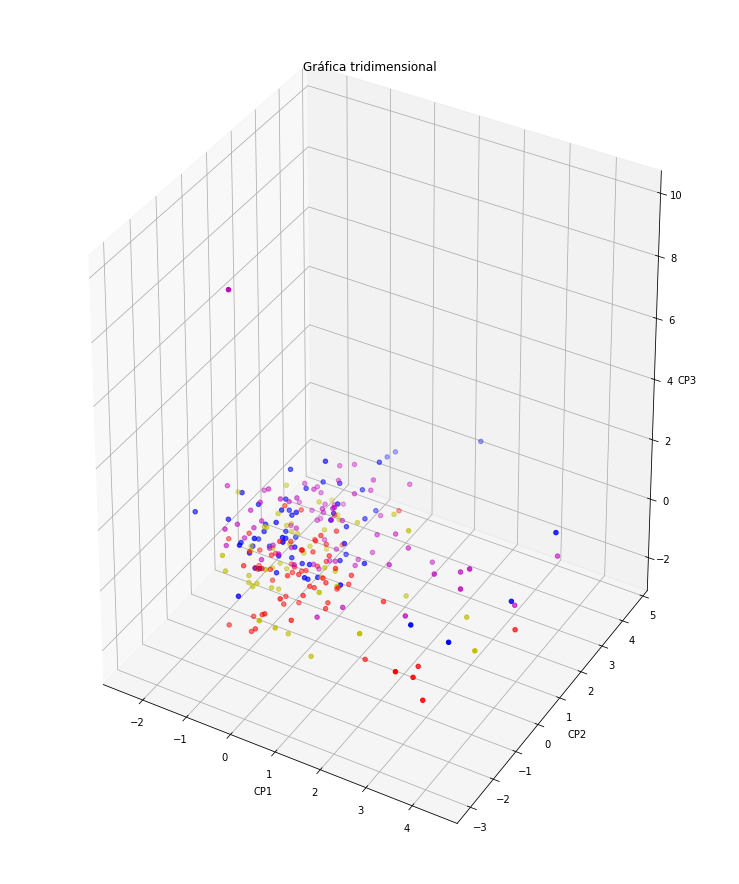

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(13, 16))
ax = fig.add_subplot(111, projection='3d')

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]
z_0 = cluster_0["CP3"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]
z_1 = cluster_1["CP3"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]
z_2 = cluster_2["CP3"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]
z_3 = cluster_3["CP3"]



ax.scatter(x_0, y_0, z_0, c='r', marker='o')
ax.scatter(x_1, y_1, z_1, c='b', marker='o')
ax.scatter(x_2, y_2, z_2, c='y', marker='o')
ax.scatter(x_3, y_3, z_3, c='m', marker='o')

ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')
plt.title("Gráfica tridimensional")

figsize=(15, 10)
plt.show()

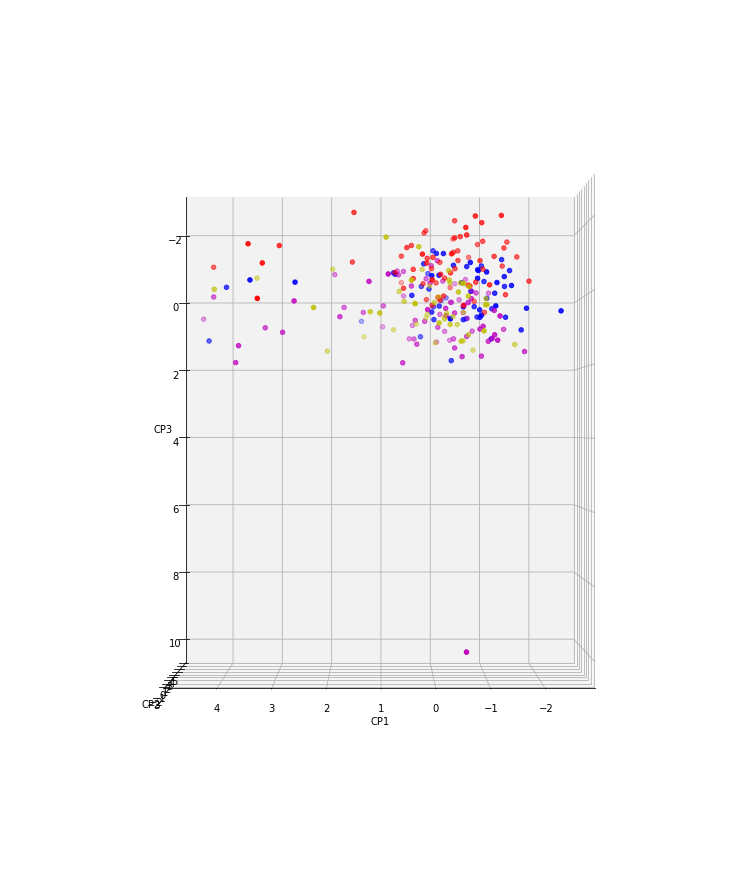

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(13, 16))
ax = fig.add_subplot(111, projection='3d')

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]
z_0 = cluster_0["CP3"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]
z_1 = cluster_1["CP3"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]
z_2 = cluster_2["CP3"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]
z_3 = cluster_3["CP3"]


ax.scatter(x_0, y_0, z_0, c='r', marker='o')
ax.scatter(x_1, y_1, z_1, c='b', marker='o')
ax.scatter(x_2, y_2, z_2, c='y', marker='o')
ax.scatter(x_3, y_3, z_3, c='m', marker='o')

ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')

ax.view_init(360, 270)
figsize=(15, 10)
plt.show()